In [1]:
# Importing libraries i'll need.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Upload DataFrame

df = pd.read_csv('Data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Shuffle the DataFrame

df = df.sample(frac=1)

In [4]:
# Convert Dataframe into numpy arrays

X = df.drop(['Outcome'], axis=1).values
y = df['Outcome'].values

In [5]:
# Import our model from sklearn and the cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [6]:
# To train model I have to create an object and fit it on the data.

tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

To make prediction we must as usual use the functiuon 'predict' or 'predict_proba'

In [7]:
tree.predict(X)

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [8]:
tree.predict_proba(X)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

The tree decision classifies isn't a probabalistic learner as logistic regression.

In [9]:
# I'm going to chek the performance of Decision Tree.

cross_val_score(tree, X, y)
# cross_val_score(tree, X, y, cv=3)

array([0.65584416, 0.62337662, 0.78571429, 0.7124183 , 0.69281046])

In [10]:
# This is the mean of the performance of Decision Tree.

np.mean(cross_val_score(tree, X, y))

0.679730073847721

In [11]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [12]:
# Feature importances shows how important a feature is for classification.
# It means how near is the splitting node of the feature to the root of the tree.

tree.feature_importances_

array([0.05113632, 0.32164501, 0.09252522, 0.0198455 , 0.04052148,
       0.2294141 , 0.12760401, 0.11730838])

<BarContainer object of 8 artists>

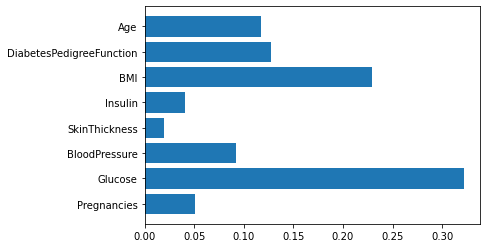

In [13]:
# Plot of the model

plt.barh(df.iloc[:, :-1].columns, tree.feature_importances_, align='center')

In [14]:
# I selected 2 top features.

X = df[['BMI', 'Glucose']].values
y = df['Outcome'].values

In [15]:
def visualise_clf(model, X, y, proba, cmap='winter'):
    ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c= y, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    if proba:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                            level = np.arange(n_classes + 1) - 0.5,
                            cmap = cmap, clim=(y.min(), y.max()),
                            zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

<ipython-input-15-b84eb84cb552>:16: UserWarning: The following kwargs were not used by contour: 'level', 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


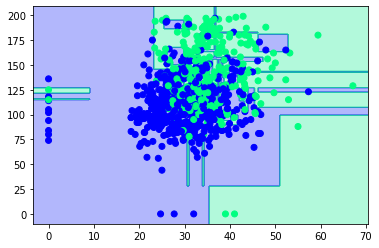

In [16]:
# Let's plot the decission bountry.

visualise_clf(tree, X, y, proba=False)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
X = df.drop(['Outcome'], axis=1).values
y = df['Outcome'].values

In [19]:
forest = RandomForestClassifier()
cross_val_score(forest, X, y)

array([0.75974026, 0.74675325, 0.80519481, 0.76470588, 0.75816993])

In [20]:
np.mean(cross_val_score(forest, X, y))

0.7643408878702995

In [21]:
forest.fit(X, y)

RandomForestClassifier()

In [22]:
forest.feature_importances_

array([0.07954537, 0.25641291, 0.09106514, 0.06929823, 0.07118027,
       0.17066925, 0.12780035, 0.13402847])

<BarContainer object of 8 artists>

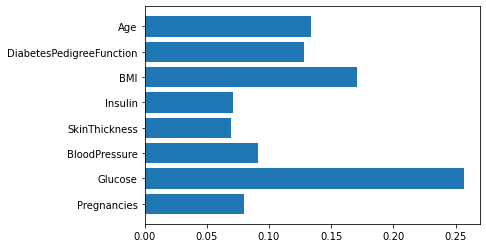

In [23]:
plt.barh(df.iloc[:, :-1].columns, forest.feature_importances_, align='center')

In [24]:
X = df[['BMI', 'Glucose']].values
y = df['Outcome'].values

<ipython-input-15-b84eb84cb552>:16: UserWarning: The following kwargs were not used by contour: 'level', 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


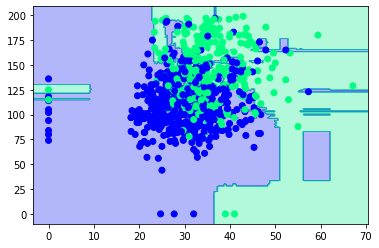

In [25]:
visualise_clf(forest, X, y, proba=False)

<ipython-input-15-b84eb84cb552>:16: UserWarning: The following kwargs were not used by contour: 'level', 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


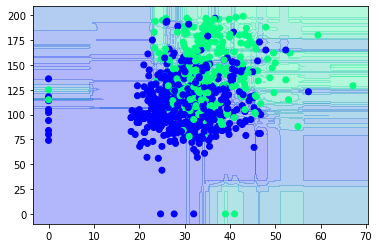

In [26]:
visualise_clf(forest, X, y, proba=True)

In [27]:
forest.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1231293270),
 DecisionTreeClassifier(max_features='auto', random_state=1253825438),
 DecisionTreeClassifier(max_features='auto', random_state=1246343702),
 DecisionTreeClassifier(max_features='auto', random_state=1686403468),
 DecisionTreeClassifier(max_features='auto', random_state=973537798),
 DecisionTreeClassifier(max_features='auto', random_state=157500727),
 DecisionTreeClassifier(max_features='auto', random_state=1424021473),
 DecisionTreeClassifier(max_features='auto', random_state=829862013),
 DecisionTreeClassifier(max_features='auto', random_state=638151636),
 DecisionTreeClassifier(max_features='auto', random_state=1000984834),
 DecisionTreeClassifier(max_features='auto', random_state=535995694),
 DecisionTreeClassifier(max_features='auto', random_state=1148682373),
 DecisionTreeClassifier(max_features='auto', random_state=409344985),
 DecisionTreeClassifier(max_features='auto', random_state=1485866173),
 DecisionTre

In [28]:
forest.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1231293270)

In [29]:
forest.estimators_[0].feature_importances_

array([0.45062296, 0.54937704])

In [30]:
df = pd.read_csv('Data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [31]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


In [32]:
# Import all modules I'LL need.

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [33]:
# Shuffle the DataFrame

df = df.sample(frac=1)

In [34]:
# Convert Dataframe into numpy arrays

X = df.drop(['expenses'], axis=1).values
y = df['expenses'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
yhat = tree.predict(X_test)
mean_absolute_error(yhat, y_test)

3087.6725671641784

In [38]:
df.corrwith(df['expenses'])

age                 0.299008
bmi                 0.198576
children            0.067998
expenses            1.000000
sex_male            0.057292
smoker_yes          0.787251
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
dtype: float64

In [39]:
X = df[['smoker_yes', 'age']].values
y = df['expenses'].values

In [40]:
def visualise_reg(model, X, y, proba, cmap='winter'):
    ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c = y, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    if proba:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                          level=np.arange(n_classes + 1) - 0.5,
                          cmap = cmap, clim=(y.min(), y.min()),
                          zorder=1)
    proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in contours.collections]
    plt.legend(proxy, [pred for pred in np.unique(y)])
    ax.set(xlim=xlim, ylim=ylim)

<ipython-input-40-eaf7b9b63f90>:14: UserWarning: The following kwargs were not used by contour: 'level', 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


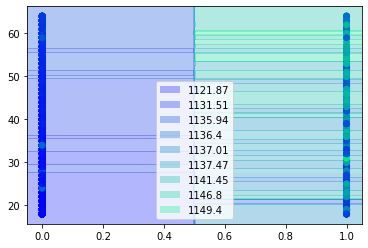

In [41]:
visualise_reg(tree, X, y, False)

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
forest = RandomForestRegressor()

In [44]:
# Convert Dataframe into numpy arrays

X = df.drop(['expenses'], axis=1).values
y = df['expenses'].values

In [45]:
# Now let's split the data set.

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
yhat = forest.predict(X_test)
mean_absolute_error(yhat, y_test)

2740.149231134328

In [48]:
X = df[['smoker_yes', 'age']].values
y = df['expenses'].values

<ipython-input-40-eaf7b9b63f90>:14: UserWarning: The following kwargs were not used by contour: 'level', 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


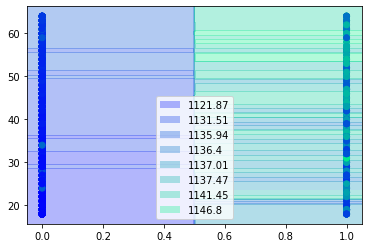

In [49]:
visualise_reg(forest, X, y, False)